# Aula 03 - Fundamentos de Python II

- Bibliotecas utilizadas

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
plt.style.use('bmh')

- Carregamento dos dados

A base de dados é constituída de informações referentes à população, continente, expectativa de vida e PIB<sup><a href="#fn1" id="ref1">1</a></sup> *per capta* de diversos países entre os anos de 1952 a 2007. O conjunto de dados pode ser encontrado [aqui](https://www.kaggle.com/datasets/tklimonova/gapminder-datacamp-2007).

In [81]:
df = pd.read_csv('../data/gapminder-FiveYearData.csv')

In [82]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Médias agrupadas

Deseja-se saber:

    "Para cada anao em nossos dados, qual foi o valor médio da expectativa de vida?"

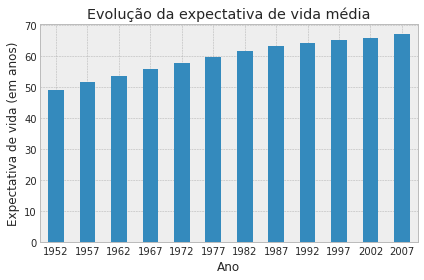

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
avg_lifeExp.plot.bar(ax = ax)
ax.set_xlabel('Ano')
ax.set_ylabel('Expectativa de vida (em anos)')
ax.set_title('Evolução da expectativa de vida média')
ax.set_xticklabels(avg_lifeExp.index.values, rotation = 0)
plt.tight_layout()
plt.show()

In [84]:
multi_group = df.groupby('year')[['lifeExp', 'pop']].mean()
multi_group

,lifeExp,pop
year,,
1952,49.057620,1.695040e+07
1957,51.507401,1.876341e+07
1962,53.609249,2.042101e+07
1967,55.678290,2.265830e+07
1972,57.647386,2.518998e+07
1977,59.570157,2.767638e+07
1982,61.533197,3.020730e+07
1987,63.212613,3.303857e+07
1992,64.160338,3.599092e+07


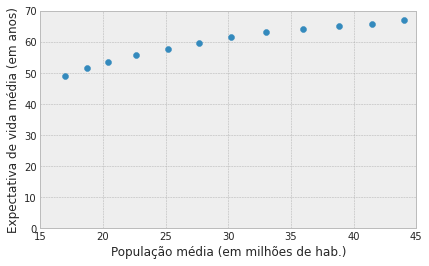

In [85]:
plt.subplots(figsize=(6, 4))
plt.scatter(multi_group['pop']/10**6, multi_group['lifeExp'])
plt.xlabel('População média (em milhões de hab.)')
plt.ylabel('Expectativa de vida média (em anos)')
plt.xlim((15, 45))
plt.ylim((0,70))
plt.show()

In [98]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
multi_group_var = multi_group_var.reset_index()
multi_group_var.columns = ['Ano', 'Continente', 'Expectativa de vida', 'PIB per capta']
multi_group_var.head()

,Ano,Continente,Expectativa de vida,PIB per capta
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650


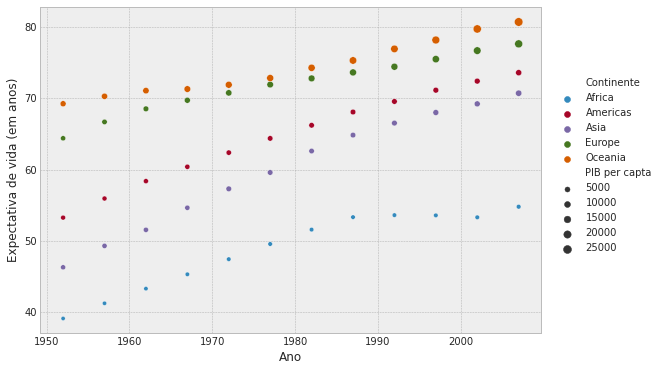

In [99]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data = multi_group_var,
    x = 'Ano', y = 'Expectativa de vida',
    hue = 'Continente', size = 'PIB per capta'
)
plt.legend(bbox_to_anchor=(1.02,.8), loc=2, borderaxespad=0.2)
plt.xlabel('Ano')
plt.ylabel('Expectativa de vida (em anos)')
plt.show()

## Contagem de frequência agrupadas

In [103]:
countries_by_continent = df.groupby('continent')['country'].nunique().sort_values(ascending=False)
countries_by_continent

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: country, dtype: int64

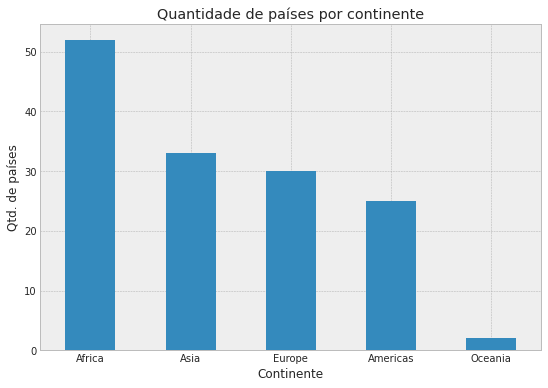

In [107]:
fig =plt.figure(figsize=(8,6))
ax = countries_by_continent.plot.bar(rot=0)
ax.set_xlabel('Continente')
ax.set_ylabel('Qtd. de países')
ax.set_title('Quantidade de países por continente')
plt.show()

<hr></hr>
<sup id="fn1">1. Produto Interno Bruto<a href="#ref1" title="Voltar ao texto.">↩</a></sup>